# MNIST Digit Classification with Convolutional Neural Network (CNN)

**Discipline(s):** Computer Vision, Deep Learning

colab에서 돌릴 경우, 런타임 유형을 GPU로 변경해주세요.

In [1]:
%env DEVICE=mps
%env TF_METAL_ENABLE=1

env: DEVICE=mps
env: TF_METAL_ENABLE=1


## 1. Import Statements

---



In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random

## 2. Data Preprocessing

---



The first step is to preprocess our data.

In [3]:
BATCH_SIZE = 100
EPOCHS = 10
LEARNING_RATE = 0.001
DEVICE = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [5]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset  = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [6]:
X_train = train_dataset.data
y_train = train_dataset.targets
X_test = test_dataset.data
y_test = test_dataset.targets

print("Training Images:", X_train.shape)  # [60000, 28, 28]
print("Testing Images:", X_test.shape)    # [10000, 28, 28]
print("Training Labels:", y_train.shape)  # [60000]
print("Test Labels:", y_test.shape)       # [10000]

Training Images: torch.Size([60000, 28, 28])
Testing Images: torch.Size([10000, 28, 28])
Training Labels: torch.Size([60000])
Test Labels: torch.Size([10000])


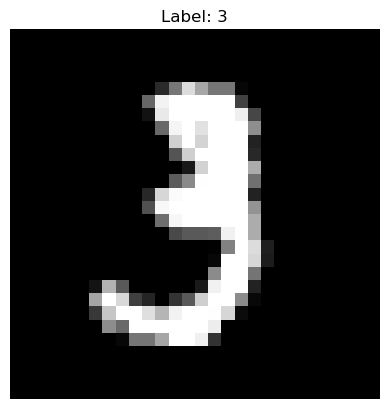

In [7]:
plt.imshow(X_train[10], cmap='gray')
plt.title(f"Label: {y_train[10].item()}")
plt.axis('off')
plt.show()

## 3. Convolutional Neural Network (CNN)

---



### 3.1. Define the Model

We then have to define our convolutional neural network.

In [8]:
# CNN 모델 정의 -> 차원이 어떻게 될지 생각하면서 코드 빈칸을 채워주세요.
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            # 모델을 더 깊게 쌓아도 됩니다.

            # fully connected layer 전, flatten 과정 필요 
            nn.Flatten(),
            nn.Linear(32 * 14 * 14, 128),
            nn.ReLU(),  
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

In [9]:
# 모델 준비
model = SimpleCNN().to(DEVICE)

Once our model is defined, we can compile it using the Adam optimizer and the categorical cross-entropy loss function.

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

### 3.2. Train the Model

In [11]:
def train(model, loader):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for x, y in loader:
        x, y = x.to(DEVICE), y.to(DEVICE)
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * y.size(0)
        correct += (output.argmax(dim=1) == y).sum().item()
        total += y.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

In [12]:
def evaluate(model, loader):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            output = model(x)
            loss = criterion(output, y)

            total_loss += loss.item() * y.size(0)
            correct += (output.argmax(dim=1) == y).sum().item()
            total += y.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

In [13]:
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_loader)
    test_loss, test_acc = evaluate(model, test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"[Epoch {epoch+1}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

[Epoch 1] Train Loss: 0.1822, Train Acc: 0.9447 | Test Loss: 0.0862, Test Acc: 0.9734
[Epoch 2] Train Loss: 0.0600, Train Acc: 0.9820 | Test Loss: 0.0592, Test Acc: 0.9806
[Epoch 3] Train Loss: 0.0391, Train Acc: 0.9878 | Test Loss: 0.0480, Test Acc: 0.9848
[Epoch 4] Train Loss: 0.0283, Train Acc: 0.9912 | Test Loss: 0.0466, Test Acc: 0.9843
[Epoch 5] Train Loss: 0.0189, Train Acc: 0.9940 | Test Loss: 0.0503, Test Acc: 0.9845
[Epoch 6] Train Loss: 0.0152, Train Acc: 0.9950 | Test Loss: 0.0514, Test Acc: 0.9830
[Epoch 7] Train Loss: 0.0118, Train Acc: 0.9963 | Test Loss: 0.0663, Test Acc: 0.9829
[Epoch 8] Train Loss: 0.0097, Train Acc: 0.9967 | Test Loss: 0.0585, Test Acc: 0.9840
[Epoch 9] Train Loss: 0.0087, Train Acc: 0.9972 | Test Loss: 0.0600, Test Acc: 0.9833
[Epoch 10] Train Loss: 0.0064, Train Acc: 0.9979 | Test Loss: 0.0540, Test Acc: 0.9860


### 3.3. 시각화

Finally, we can plot the curves.

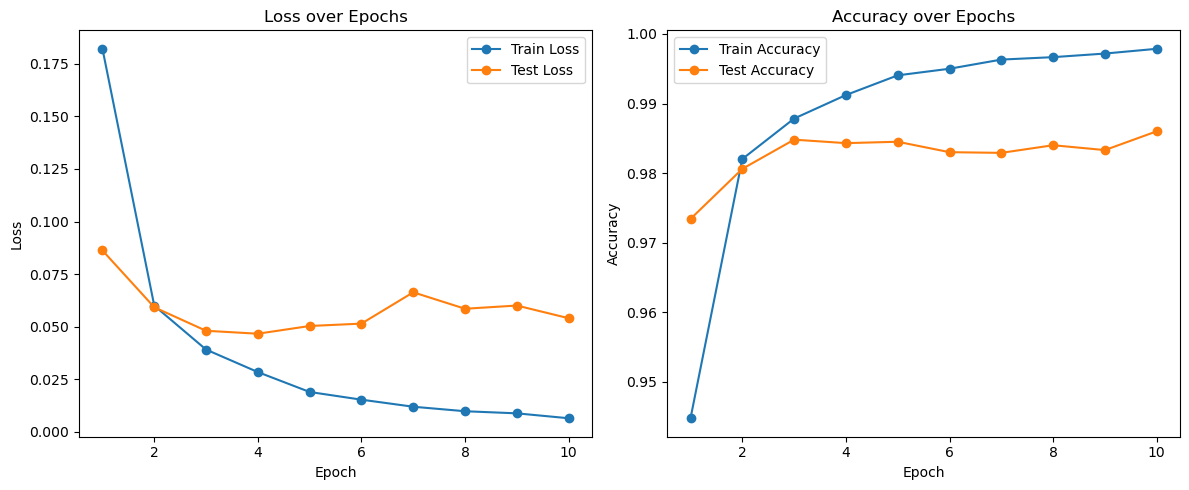

In [14]:
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, test_losses, label='Test Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

## 4. Make a Prediction

---



Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

In [15]:
def show_random_predictions(model, dataset, num_images=5):
    model.eval()

    indices = random.sample(range(len(dataset)), num_images)
    images = torch.stack([dataset[i][0] for i in indices])
    labels = torch.tensor([dataset[i][1] for i in indices])

    images = images.to(DEVICE)
    outputs = model(images)
    preds = outputs.argmax(dim=1)

    plt.figure(figsize=(12, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.title(f"GT: {labels[i].item()}\nPred: {preds[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Finally, we can show a random test image with its corresponding prediction.

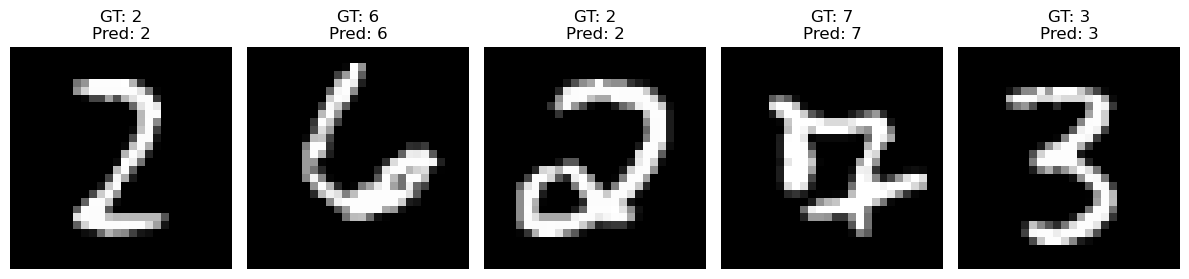

In [16]:
show_random_predictions(model, test_dataset, num_images=5)

## ResNet

In [17]:
BATCH_SIZE = 100    
EPOCHS = 10
LEARNING_RATE = 0.001
DEVICE = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [18]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        # batch normalization
        self.bn1 = nn.BatchNorm2d(out_channels)
        # activation function
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)

        # 추가로 layer 등을 더 구현하셔도 됩니다.
        self.conv3 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu2 = nn.ReLU()

        # Skip connection: 채널 수가 다르면 어떤 convolution layer를 사용하는게 좋을지 생각해주세요.
        if in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.shortcut = nn.Identity()

    def forward(self, x):
        identity = self.shortcut(x)

        # 빈칸 채우기
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        out = self.conv3(out)
        out += identity
        return self.relu(out)

In [19]:
class ResNetLike(nn.Module):
    def __init__(self):
        super().__init__()
        self.stem = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # layer 등을 추가로 더 쌓으셔도 됩니다.
        self.layer1 = ResidualBlock(16, 32)
        self.layer2 = ResidualBlock(32, 64)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        # 빈칸을 채워주세요.
        self.fc = nn.Linear(64, 10)

    def forward(self, x):
        # 빈칸을 채워주세요.
        x = self.stem(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [20]:
model = ResNetLike().to(DEVICE)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [22]:
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_loader)
    test_loss, test_acc = evaluate(model, test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"[Epoch {epoch+1}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

[Epoch 1] Train Loss: 0.2437, Train Acc: 0.9263 | Test Loss: 0.1419, Test Acc: 0.9549
[Epoch 2] Train Loss: 0.0580, Train Acc: 0.9823 | Test Loss: 0.0701, Test Acc: 0.9787
[Epoch 3] Train Loss: 0.0417, Train Acc: 0.9872 | Test Loss: 0.0422, Test Acc: 0.9865
[Epoch 4] Train Loss: 0.0324, Train Acc: 0.9898 | Test Loss: 0.0539, Test Acc: 0.9834
[Epoch 5] Train Loss: 0.0290, Train Acc: 0.9907 | Test Loss: 0.0520, Test Acc: 0.9833
[Epoch 6] Train Loss: 0.0257, Train Acc: 0.9922 | Test Loss: 0.0411, Test Acc: 0.9869
[Epoch 7] Train Loss: 0.0209, Train Acc: 0.9932 | Test Loss: 0.0520, Test Acc: 0.9853
[Epoch 8] Train Loss: 0.0198, Train Acc: 0.9939 | Test Loss: 0.0266, Test Acc: 0.9919
[Epoch 9] Train Loss: 0.0202, Train Acc: 0.9933 | Test Loss: 0.0231, Test Acc: 0.9926
[Epoch 10] Train Loss: 0.0165, Train Acc: 0.9945 | Test Loss: 0.0385, Test Acc: 0.9889


### 시각화

Finally, we can plot the curves.

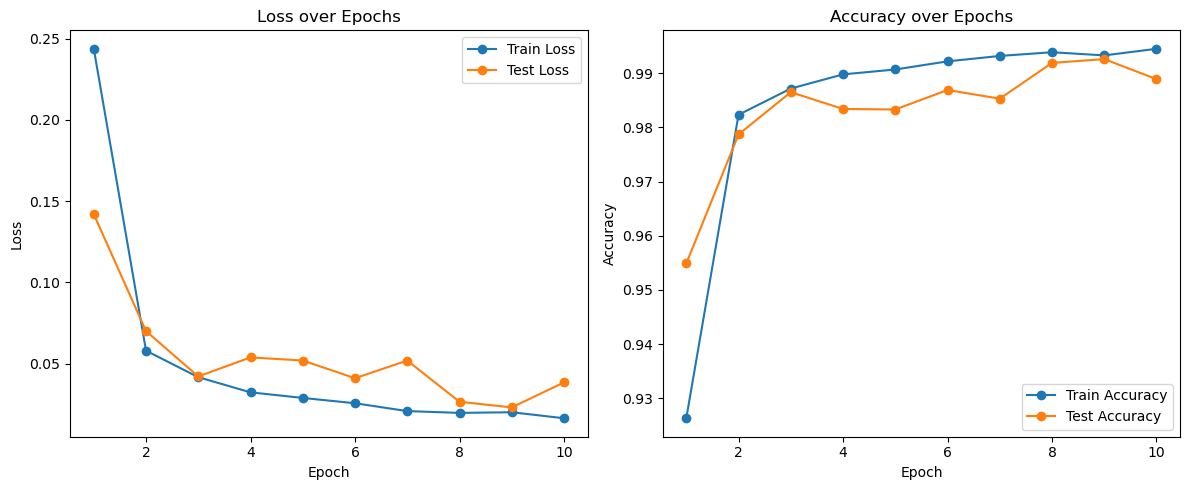

In [23]:
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, test_losses, label='Test Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

### Make a Prediction

---



Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

In [24]:
def show_random_predictions(model, dataset, num_images=5):
    model.eval()

    indices = random.sample(range(len(dataset)), num_images)
    images = torch.stack([dataset[i][0] for i in indices])
    labels = torch.tensor([dataset[i][1] for i in indices])

    images = images.to(DEVICE)
    outputs = model(images)
    preds = outputs.argmax(dim=1)

    plt.figure(figsize=(12, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.title(f"GT: {labels[i].item()}\nPred: {preds[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Finally, we can show a random test image with its corresponding prediction.

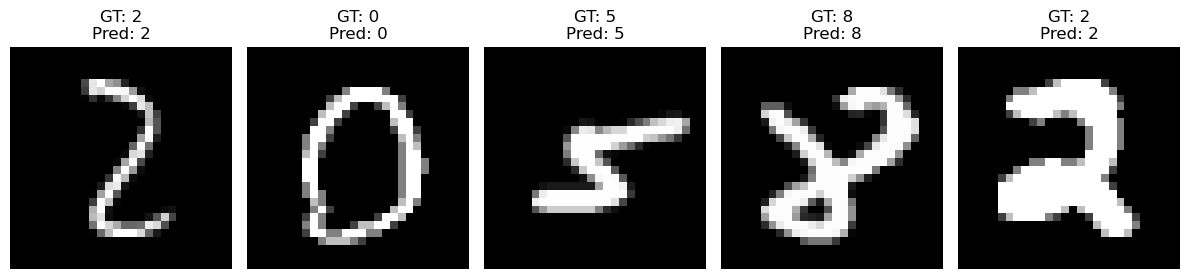

In [25]:
show_random_predictions(model, test_dataset, num_images=5)

# 다른 데이터셋으로도 진행해보기

## Fashion-MNIST Dataset

Fashion-MNIST는 MNIST와 같은 형태(28x28 그레이스케일)이지만 의류 아이템으로 구성된 데이터셋


In [26]:
# Fashion-MNIST 데이터셋 로드
fashion_train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
fashion_test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

fashion_train_loader = DataLoader(fashion_train_dataset, batch_size=BATCH_SIZE, shuffle=True)
fashion_test_loader = DataLoader(fashion_test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Fashion-MNIST 클래스 이름 정의
fashion_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Fashion-MNIST Training Images:", len(fashion_train_dataset))
print("Fashion-MNIST Testing Images:", len(fashion_test_dataset))
print("Classes:", fashion_classes)

100%|██████████| 26.4M/26.4M [00:04<00:00, 6.43MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 96.0kB/s]
100%|██████████| 4.42M/4.42M [00:02<00:00, 2.08MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 19.1MB/s]

Fashion-MNIST Training Images: 60000
Fashion-MNIST Testing Images: 10000
Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


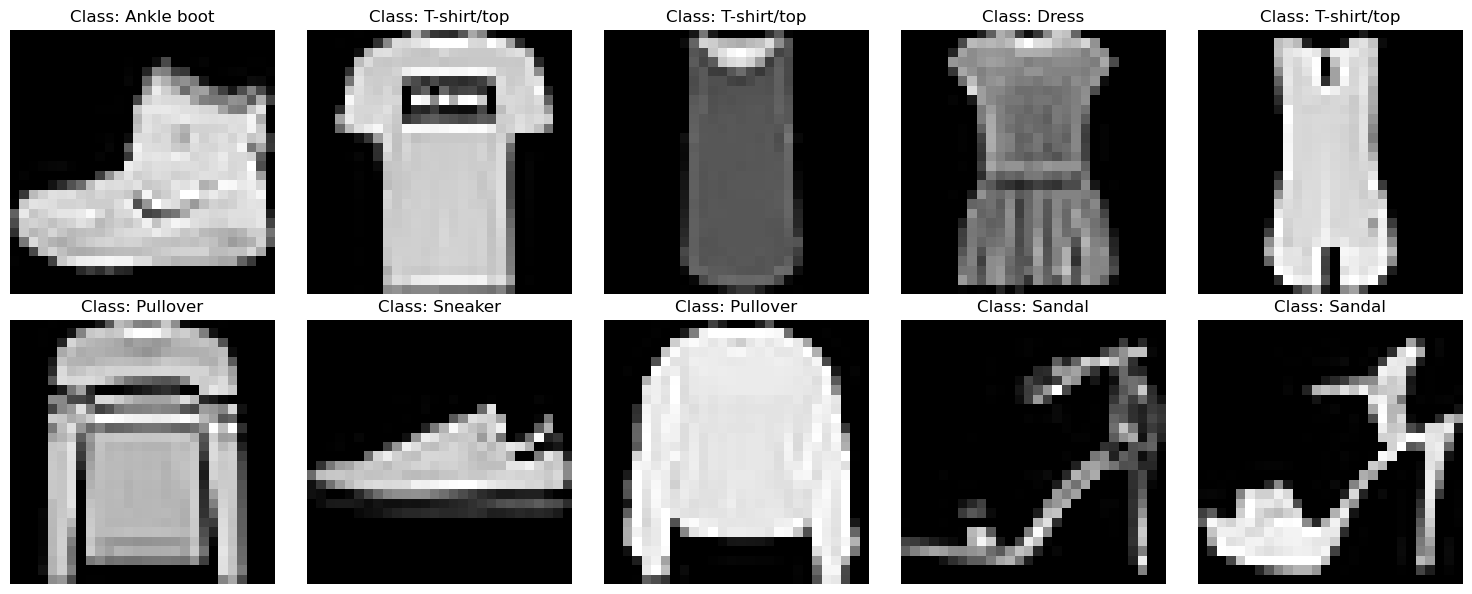

In [27]:
# Fashion-MNIST 샘플 이미지 시각화
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    image, label = fashion_train_dataset[i]
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Class: {fashion_classes[label]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Fashion-MNIST에 Simple CNN 적용

In [29]:
# Fashion-MNIST CNN 모델 훈련
fashion_cnn_model = SimpleCNN().to(DEVICE)
fashion_cnn_criterion = nn.CrossEntropyLoss()
fashion_cnn_optimizer = optim.Adam(fashion_cnn_model.parameters(), lr=LEARNING_RATE)

print("Fashion-MNIST CNN 모델 훈련 시작...")

fashion_cnn_train_losses = []
fashion_cnn_train_accuracies = []
fashion_cnn_test_losses = []
fashion_cnn_test_accuracies = []

# 전역 변수 업데이트
model = fashion_cnn_model
criterion = fashion_cnn_criterion
optimizer = fashion_cnn_optimizer

# 훈련 실행
for epoch in range(EPOCHS):
    train_loss, train_acc = train(fashion_cnn_model, fashion_train_loader)
    test_loss, test_acc = evaluate(fashion_cnn_model, fashion_test_loader)

    fashion_cnn_train_losses.append(train_loss)
    fashion_cnn_train_accuracies.append(train_acc)
    fashion_cnn_test_losses.append(test_loss)
    fashion_cnn_test_accuracies.append(test_acc)

    print(f"[Epoch {epoch+1}/{EPOCHS}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

Fashion-MNIST CNN 모델 훈련 시작...
[Epoch 1/10] Train Loss: 0.3967, Train Acc: 0.8576 | Test Loss: 0.3242, Test Acc: 0.8836
[Epoch 2/10] Train Loss: 0.2647, Train Acc: 0.9035 | Test Loss: 0.2808, Test Acc: 0.8973
[Epoch 3/10] Train Loss: 0.2204, Train Acc: 0.9201 | Test Loss: 0.2646, Test Acc: 0.9043
[Epoch 4/10] Train Loss: 0.1912, Train Acc: 0.9294 | Test Loss: 0.2444, Test Acc: 0.9125
[Epoch 5/10] Train Loss: 0.1663, Train Acc: 0.9387 | Test Loss: 0.2658, Test Acc: 0.9056
[Epoch 6/10] Train Loss: 0.1443, Train Acc: 0.9456 | Test Loss: 0.2551, Test Acc: 0.9146
[Epoch 7/10] Train Loss: 0.1274, Train Acc: 0.9522 | Test Loss: 0.2687, Test Acc: 0.9146
[Epoch 8/10] Train Loss: 0.1085, Train Acc: 0.9603 | Test Loss: 0.2739, Test Acc: 0.9127
[Epoch 9/10] Train Loss: 0.0940, Train Acc: 0.9657 | Test Loss: 0.2700, Test Acc: 0.9193
[Epoch 10/10] Train Loss: 0.0823, Train Acc: 0.9695 | Test Loss: 0.2972, Test Acc: 0.9121


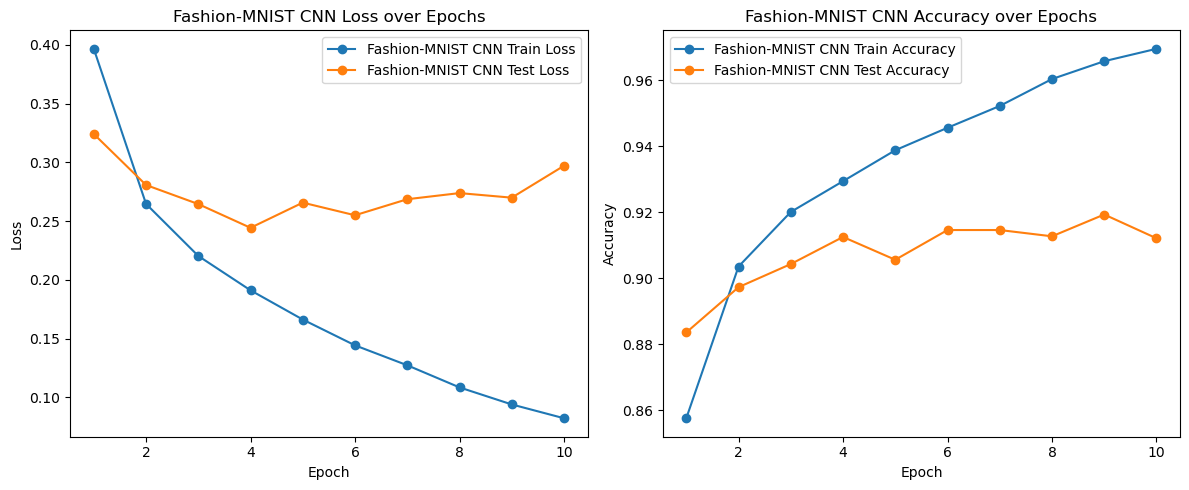

In [30]:
# Fashion-MNIST CNN 결과 시각화
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, fashion_cnn_train_losses, label='Fashion-MNIST CNN Train Loss', marker='o')
plt.plot(epochs, fashion_cnn_test_losses, label='Fashion-MNIST CNN Test Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Fashion-MNIST CNN Loss over Epochs")
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, fashion_cnn_train_accuracies, label='Fashion-MNIST CNN Train Accuracy', marker='o')
plt.plot(epochs, fashion_cnn_test_accuracies, label='Fashion-MNIST CNN Test Accuracy', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Fashion-MNIST CNN Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

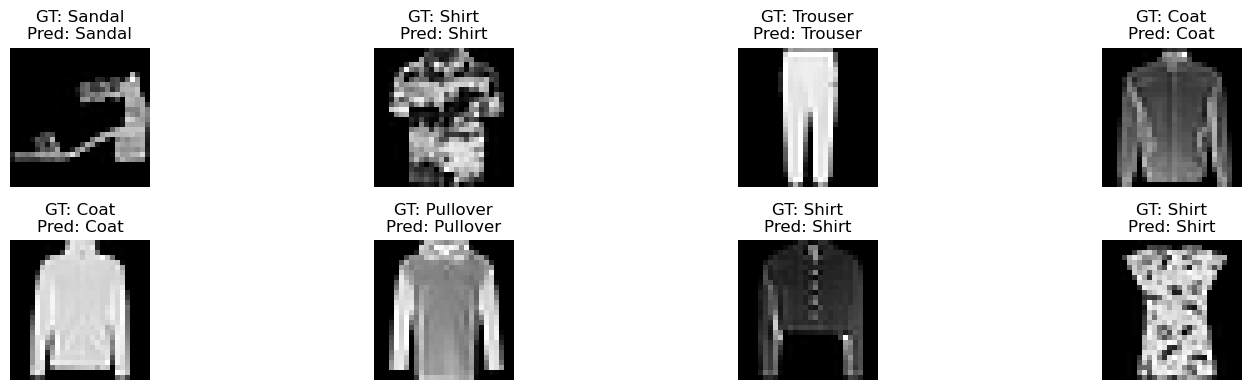

In [31]:
# Fashion-MNIST CNN 예측 결과 확인
def show_fashion_predictions(model, dataset, class_names, num_images=8):
    model.eval()
    
    indices = random.sample(range(len(dataset)), num_images)
    images = torch.stack([dataset[i][0] for i in indices])
    labels = torch.tensor([dataset[i][1] for i in indices])
    
    images = images.to(DEVICE)
    outputs = model(images)
    preds = outputs.argmax(dim=1)
    
    plt.figure(figsize=(16, 4))
    for i in range(num_images):
        plt.subplot(2, 4, i+1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.title(f"GT: {class_names[labels[i].item()]}\nPred: {class_names[preds[i].item()]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_fashion_predictions(fashion_cnn_model, fashion_test_dataset, fashion_classes, num_images=8)

### Fashion-MNIST에 ResNet 적용

In [33]:
# Fashion-MNIST ResNet 모델 훈련
fashion_resnet_model = ResNetLike().to(DEVICE)
fashion_resnet_criterion = nn.CrossEntropyLoss()
fashion_resnet_optimizer = optim.Adam(fashion_resnet_model.parameters(), lr=LEARNING_RATE)

print("Fashion-MNIST ResNet 모델 훈련 시작...")

fashion_resnet_train_losses = []
fashion_resnet_train_accuracies = []
fashion_resnet_test_losses = []
fashion_resnet_test_accuracies = []

# 전역 변수 업데이트
model = fashion_resnet_model
criterion = fashion_resnet_criterion
optimizer = fashion_resnet_optimizer

# 훈련 실행
for epoch in range(EPOCHS):
    train_loss, train_acc = train(fashion_resnet_model, fashion_train_loader)
    test_loss, test_acc = evaluate(fashion_resnet_model, fashion_test_loader)

    fashion_resnet_train_losses.append(train_loss)
    fashion_resnet_train_accuracies.append(train_acc)
    fashion_resnet_test_losses.append(test_loss)
    fashion_resnet_test_accuracies.append(test_acc)

    print(f"[Epoch {epoch+1}/{EPOCHS}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

Fashion-MNIST ResNet 모델 훈련 시작...
[Epoch 1/10] Train Loss: 0.5571, Train Acc: 0.7950 | Test Loss: 0.3871, Test Acc: 0.8583
[Epoch 2/10] Train Loss: 0.3342, Train Acc: 0.8783 | Test Loss: 0.3198, Test Acc: 0.8855
[Epoch 3/10] Train Loss: 0.2835, Train Acc: 0.8970 | Test Loss: 0.3379, Test Acc: 0.8805
[Epoch 4/10] Train Loss: 0.2559, Train Acc: 0.9071 | Test Loss: 0.3344, Test Acc: 0.8819
[Epoch 5/10] Train Loss: 0.2360, Train Acc: 0.9150 | Test Loss: 0.2999, Test Acc: 0.8986
[Epoch 6/10] Train Loss: 0.2200, Train Acc: 0.9202 | Test Loss: 0.2723, Test Acc: 0.9018
[Epoch 7/10] Train Loss: 0.2071, Train Acc: 0.9260 | Test Loss: 0.3082, Test Acc: 0.8878
[Epoch 8/10] Train Loss: 0.1969, Train Acc: 0.9284 | Test Loss: 0.3263, Test Acc: 0.8808
[Epoch 9/10] Train Loss: 0.1851, Train Acc: 0.9330 | Test Loss: 0.2977, Test Acc: 0.8954
[Epoch 10/10] Train Loss: 0.1776, Train Acc: 0.9353 | Test Loss: 0.3116, Test Acc: 0.8979


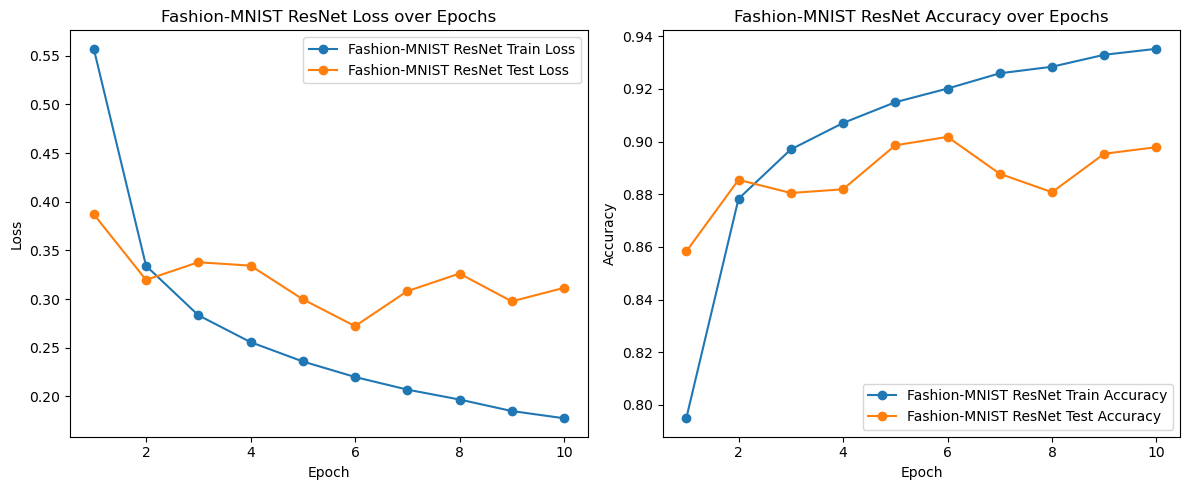

In [34]:
# Fashion-MNIST ResNet 결과 시각화
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, fashion_resnet_train_losses, label='Fashion-MNIST ResNet Train Loss', marker='o')
plt.plot(epochs, fashion_resnet_test_losses, label='Fashion-MNIST ResNet Test Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Fashion-MNIST ResNet Loss over Epochs")
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, fashion_resnet_train_accuracies, label='Fashion-MNIST ResNet Train Accuracy', marker='o')
plt.plot(epochs, fashion_resnet_test_accuracies, label='Fashion-MNIST ResNet Test Accuracy', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Fashion-MNIST ResNet Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

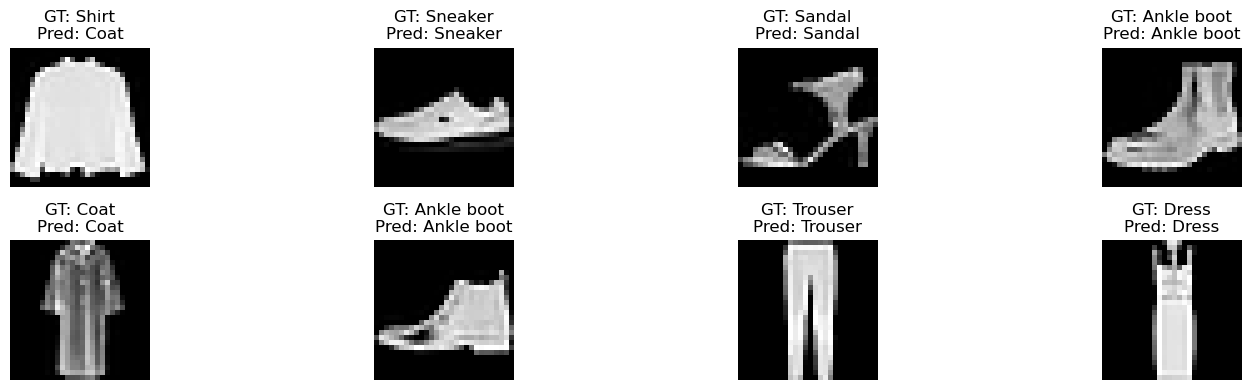

In [35]:
# Fashion-MNIST ResNet 예측 결과 확인
show_fashion_predictions(fashion_resnet_model, fashion_test_dataset, fashion_classes, num_images=8)